In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

import plotly.express as px
import plotly.graph_objects as go

import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


import statsmodels.api as sm

color = sns.color_palette()
sns.set_style('darkgrid')

from numpy.random import seed
seed(1)


import tensorflow
tensorflow.random.set_seed(1)

In [3]:
age_details = pd.read_csv('../input/covid19-in-india/AgeGroupDetails.csv')
#india_covid_19 = pd.read_csv('covid_19_india.csv')
hospital_beds = pd.read_csv('../input/covid19-in-india/HospitalBedsIndia.csv')
individual_details = pd.read_csv('../input/covid19-in-india/IndividualDetails.csv')
ICMR_details = pd.read_csv('../input/covid19-in-india/ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('../input/covid19-in-india/ICMRTestingLabs.csv')
state_testing = pd.read_csv('../input/covid19-in-india/StatewiseTestingDetails.csv')
population = pd.read_csv('../input/covid19-in-india/population_india_census2011.csv')

world_population = pd.read_csv('../input/covid19-in-india/population_india_census2011.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')

#india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'],dayfirst = True)
state_testing['Date'] = pd.to_datetime(state_testing['Date'])
ICMR_details['DateTime'] = pd.to_datetime(ICMR_details['DateTime'],dayfirst = True)
ICMR_details = ICMR_details.dropna(subset=['TotalSamplesTested', 'TotalPositiveCases'])

In [4]:
covid_19_india=pd.read_csv('../input/covid19-in-india/covid_19_india.csv')

In [5]:
covid_19_india.Date = pd.to_datetime(covid_19_india.Date, dayfirst=True)

In [6]:
#Active cases of corona in India
covid_19_india['Active'] = covid_19_india['Confirmed'] - covid_19_india['Cured'] - covid_19_india['Deaths']
covid_19_india.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
1930,1931,2020-05-14,8:00 AM,Telengana,-,-,940,34,1367,393
1931,1932,2020-05-14,8:00 AM,Tripura,-,-,16,0,155,139
1932,1933,2020-05-14,8:00 AM,Uttarakhand,-,-,46,1,72,25
1933,1934,2020-05-14,8:00 AM,Uttar Pradesh,-,-,1902,83,3729,1744
1934,1935,2020-05-14,8:00 AM,West Bengal,-,-,702,207,2290,1381


In [7]:
state_per_day = covid_19_india.groupby(["Date" , "State/UnionTerritory"])["Confirmed","Deaths", "Cured" , "Active"].sum().reset_index().sort_values("Date", ascending = True)
kerala_per_day = state_per_day.loc[state_per_day['State/UnionTerritory'] == 'Kerala']
delhi_per_day = state_per_day.loc[state_per_day['State/UnionTerritory'] == 'Delhi']
maharshtra_per_day = state_per_day.loc[state_per_day['State/UnionTerritory'] == 'Maharashtra'] 
gujarat_per_day = state_per_day.loc[state_per_day['State/UnionTerritory'] == 'Gujarat']

In [8]:
df = maharshtra_per_day[['Date', 'Confirmed']]
df = df[df.Date >= '2020-03-27']
df.reset_index()
df = df.set_index("Date")
print(df)

            Confirmed
Date                 
2020-03-27        130
2020-03-28        180
2020-03-29        186
2020-03-30        198
2020-03-31        216
2020-04-01        302
2020-04-02        335
2020-04-03        335
2020-04-04        490
2020-04-05        490
2020-04-06        748
2020-04-07        868
2020-04-08       1018
2020-04-09       1135
2020-04-10       1364
2020-04-11       1574
2020-04-12       1761
2020-04-13       1985
2020-04-14       2337
2020-04-15       2687
2020-04-16       2919
2020-04-17       3205
2020-04-18       3323
2020-04-19       3651
2020-04-20       4203
2020-04-21       4669
2020-04-22       5221
2020-04-23       5652
2020-04-24       6430
2020-04-25       6817
2020-04-26       7628
2020-04-27       8068
2020-04-28       8590
2020-04-29       9318
2020-04-30       9915
2020-05-01      10498
2020-05-02      11506
2020-05-03      12296
2020-05-04      12974
2020-05-05      14541
2020-05-06      15525
2020-05-07      16758
2020-05-08      17974
2020-05-09

In [9]:
dfa = maharshtra_per_day[['Date', 'Confirmed']]
dfa.days = dfa.index
dfa["Days"] = dfa.index[:]
dfa.drop(['Date'] , axis =1)

,Confirmed,Days
79,2,79
91,5,91
103,2,103
116,11,116
129,14,129
...,...,...
1789,20228,1789
1822,22171,1822
1855,23401,1855
1888,24427,1888


In [10]:
X_dfa = pd.DataFrame(dfa["Days"])
y_dfa = pd.DataFrame(dfa["Confirmed"])
X_traindfa = X_dfa[:-10]
y_traindfa = y_dfa[:-10]
X_testdfa = X_dfa[-10:]
y_testdfa = y_dfa[-10:]

In [11]:
y_testdfa.shape

(10, 1)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_traindfa)

In [13]:
lr = LinearRegression()
lr.fit(X_poly ,y_traindfa)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_trainpred = lr.predict(poly_reg.fit_transform(X_traindfa))
y_testpred = lr.predict(poly_reg.fit_transform(X_testdfa))

In [15]:
y_testpoly = y_dfa[-10:]
y_testpoly['Confirmed'] = y_testdfa[:]
y_testpoly['Predicted'] = y_testpred[:]
y_testpoly.round(1)

,Confirmed,Predicted
1624,14541,13879.2
1657,15525,14784.4
1690,16758,15723.3
1723,17974,16696.3
1756,19063,17703.4
1789,20228,18744.6
1822,22171,19820.2
1855,23401,20930.0
1888,24427,22074.1
1921,25922,23252.4


In [16]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_testpoly['Confirmed'], y_testpoly['Predicted']))
import math
print(math.sqrt(mean_squared_error(y_testpoly['Confirmed'], y_testpoly['Predicted'])))

3203391.260625293
1789.8020171586836


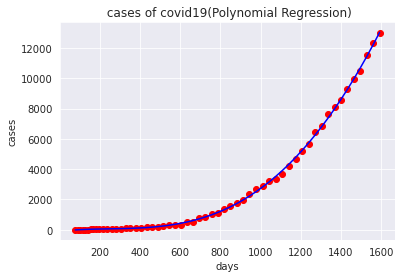

In [17]:
plt.scatter(X_traindfa, y_traindfa, color = 'red')
plt.plot(X_traindfa, y_trainpred, color = 'blue')
plt.title(' cases of covid19(Polynomial Regression)')
plt.xlabel('days')
plt.ylabel('cases')
plt.show()

In [18]:
y_testdfa.shape

(10, 1)

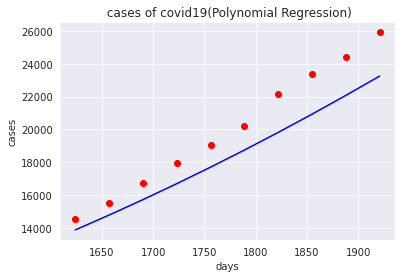

In [19]:
plt.scatter(X_testdfa, y_testdfa, color = 'red')
plt.plot(X_testdfa, y_testpred, color = 'blue')
plt.title(' cases of covid19(Polynomial Regression)')
plt.xlabel('days')
plt.ylabel('cases')
plt.show()

LSTM 

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
n_size = 5

In [22]:
train_data = df[:len(df)-2*n_size]
validation_data = df[len(df)-2*n_size : len(df)-n_size]
test_data = df[len(df)-n_size:]
train_data.shape

(39, 1)

In [23]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_validation_data = scaler.transform(validation_data)
scaled_test_data = scaler.transform(test_data)

In [24]:
scaled_data = np.concatenate((scaled_train_data , scaled_validation_data, scaled_test_data) , 0)
scaled_data.shape

(49, 1)

In [25]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [26]:
n_input = 20
scaled_temptest_data = scaled_data[-n_size-n_input:]
scaled_data.shape

(49, 1)

In [27]:
scaled_data[-n_input-20:-n_input].shape
scaled_temptest_data.shape

(25, 1)

In [28]:
from keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

In [29]:
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

In [30]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [31]:
n_input = 30

In [32]:
X_train = []
y_train = []
for i in range(n_input, len(scaled_train_data)):
    X_train.append(scaled_train_data[i-n_input:i, 0])
    y_train.append(scaled_train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [33]:
X_test = []
y_test = []
for i in range(len(scaled_data)-n_size , len(scaled_data)):
    X_test.append(scaled_data[i-n_input:i, 0])
    y_test.append(scaled_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [34]:
X_valid = []
y_valid = []
for i in range(len(scaled_data)-2*n_size , len(scaled_data)-n_size):
    X_valid.append(scaled_data[i-n_input:i, 0])
    y_valid.append(scaled_data[i, 0])
X_valid, y_valid = np.array(X_valid), np.array(y_valid)

X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))

In [35]:
lstm_model = Sequential()
#lstm_model.add(LSTM(200, activation='tanh', input_shape=(n_input, n_features)))
lstm_model.add(LSTM(200,activation='swish' ,input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.5))
#lstm_model.add(LSTM(200, activation='relu', input_shape=(None)))
lstm_model.add(Dense(1))
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
lstm_model.compile(optimizer='Adadelta', loss='mse', metrics=['accuracy'])#, learning_rate=0.01)

lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [36]:
lstm_model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid , y_valid) , batch_size = 1 )

Train on 9 samples, validate on 5 samples
Epoch 1/30
9/9 [==============================] - 1s 117ms/step - loss: 0.5498 - accuracy: 0.0000e+00 - val_loss: 1.3704 - val_accuracy: 0.0000e+00
Epoch 2/30
9/9 [==============================] - 0s 21ms/step - loss: 0.4280 - accuracy: 0.0000e+00 - val_loss: 1.0627 - val_accuracy: 0.0000e+00
Epoch 3/30
9/9 [==============================] - 0s 20ms/step - loss: 0.2632 - accuracy: 0.0000e+00 - val_loss: 0.6343 - val_accuracy: 0.0000e+00
Epoch 4/30
9/9 [==============================] - 0s 21ms/step - loss: 0.0845 - accuracy: 0.1111 - val_loss: 0.1211 - val_accuracy: 0.0000e+00
Epoch 5/30
9/9 [==============================] - 0s 24ms/step - loss: 0.0094 - accuracy: 0.1111 - val_loss: 0.0786 - val_accuracy: 0.0000e+00
Epoch 6/30
9/9 [==============================] - 0s 21ms/step - loss: 0.0128 - accuracy: 0.1111 - val_loss: 0.1093 - val_accuracy: 0.0000e+00
Epoch 7/30
9/9 [==============================] - 0s 21ms/step - loss: 0.0092 - accurac

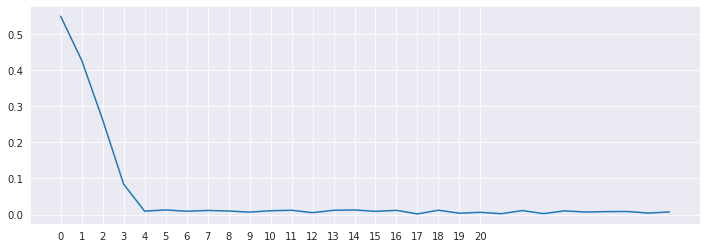

In [37]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

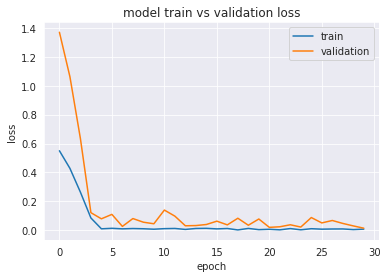

In [38]:
plt.plot(lstm_model.history.history['loss'])
plt.plot(lstm_model.history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [39]:
predValid_case = lstm_model.predict(X_valid)
predTest_case = lstm_model.predict(X_test)
predTrain_case = lstm_model.predict(X_train)

In [40]:
predValid_casex = scaler.inverse_transform(predValid_case)
predTest_casex = scaler.inverse_transform(predTest_case)
predTrain_casex = scaler.inverse_transform(predTrain_case)

In [41]:
test_datatmp= test_data
test_datatmp["Predicted"] = predTest_casex[:]
test_datatmp.round(1)

,Confirmed,Predicted
Date,,
2020-05-10,20228,18620.500000
2020-05-11,22171,20019.800781
2020-05-12,23401,21676.400391
2020-05-13,24427,23521.699219
2020-05-14,25922,25561.199219


In [42]:
valid_datatmp= validation_data
valid_datatmp["Predicted"] = predValid_casex[:]
valid_datatmp.round(1)

,Confirmed,Predicted
Date,,
2020-05-05,14541,13439.000000
2020-05-06,15525,14273.700195
2020-05-07,16758,15185.299805
2020-05-08,17974,16211.799805
2020-05-09,19063,17358.400391


In [43]:
totest_data = pd.concat(( valid_datatmp , test_datatmp) , 0)
totest_data.round(1)

,Confirmed,Predicted
Date,,
2020-05-05,14541,13439.000000
2020-05-06,15525,14273.700195
2020-05-07,16758,15185.299805
2020-05-08,17974,16211.799805
2020-05-09,19063,17358.400391
2020-05-10,20228,18620.500000
2020-05-11,22171,20019.800781
2020-05-12,23401,21676.400391
2020-05-13,24427,23521.699219


In [44]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(totest_data['Confirmed'], totest_data['Predicted']))
import math
print(math.sqrt(mean_squared_error(totest_data['Confirmed'], totest_data['Predicted'])))

2240015.4665468214
1496.6681217112969


In [45]:
train_datatmp= train_data[n_input:]
train_datatmp["Predicted"] = predTrain_casex[:]
train_datatmp.round(1)

,Confirmed,Predicted
Date,,
2020-04-26,7628,8706.599609
2020-04-27,8068,9105.500000
2020-04-28,8590,9519.400391
2020-04-29,9318,9956.700195
2020-04-30,9915,10435.900391
2020-05-01,10498,10943.700195
2020-05-02,11506,11479.500000
2020-05-03,12296,12086.400391
2020-05-04,12974,12742.599609


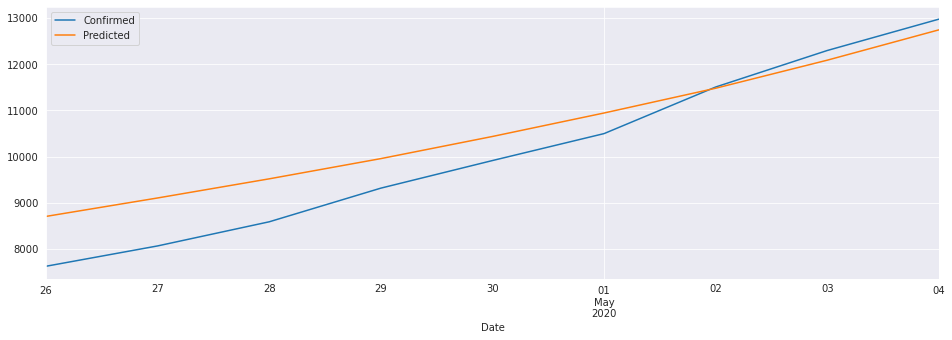

In [46]:
train_datatmp['Confirmed'].plot(figsize = (16,5), legend=True)
train_datatmp['Predicted'].plot(legend = True)

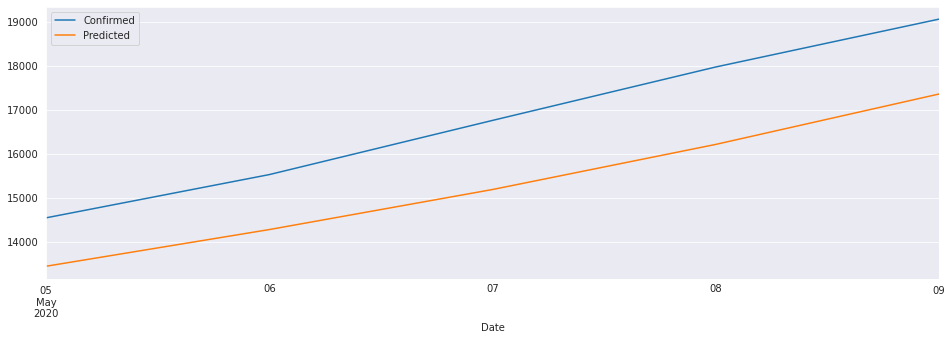

In [47]:
valid_datatmp['Confirmed'].plot(figsize = (16,5), legend=True)
valid_datatmp['Predicted'].plot(legend = True)

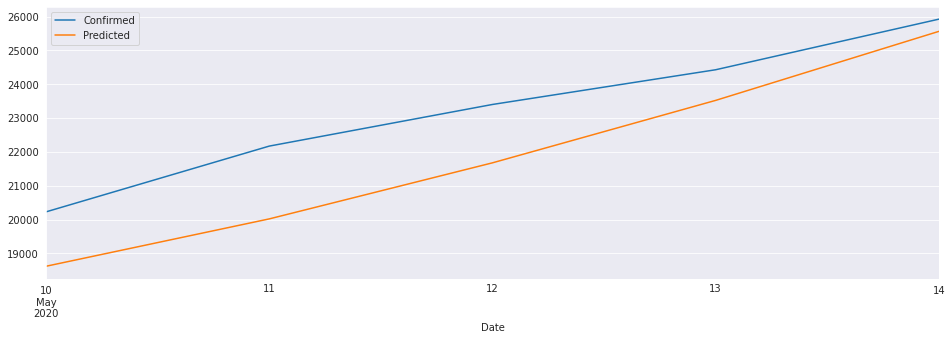

In [48]:
test_datatmp['Confirmed'].plot(figsize = (16,5), legend=True)
test_datatmp['Predicted'].plot(legend = True)

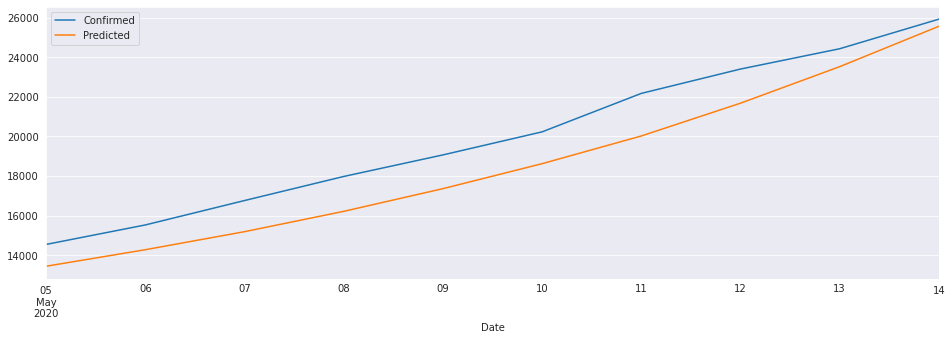

In [49]:
totest_data['Confirmed'].plot(figsize = (16,5), legend=True)
totest_data['Predicted'].plot(legend = True)